<h1>CNN on CIFAR-10 dataset</h1>

* Has 50,000 training images
* Has 10,000 test images
* Shape of each image = (32,32)
* These are color images - RGB
* Shape of entire training data = (50000,32,32,3)
                                  (samples, width, height, channels)

importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the data

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print("Shape of the training data: ", X_train.shape)
print("Shape of the testing data: ", X_test.shape)

Shape of the training data:  (50000, 32, 32, 3)
Shape of the testing data:  (10000, 32, 32, 3)


In [5]:
single_image = X_train[0]
print("Shape of single image: ",single_image.shape)

Shape of single image:  (32, 32, 3)


The labelled digit of the below plot:  [6] 



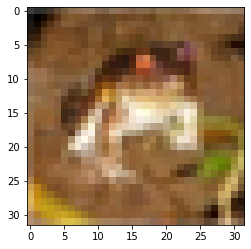

In [7]:
plt.imshow(single_image)
print("The labelled digit of the below plot: ", y_train[0],"\n")

Pre-processing:- One Hot Encoding & reshaping the data

0 - Airplane

1 - Automobile

2 - Bird

3 - Cat

4 - Deer

5 - Dog

6 - Frog

7 - Horse

8 - Ship

9 - Truck

In [8]:
# One Hot Encoding 

from tensorflow.keras.utils import to_categorical       # converts to binary class matrix
print("Shape before encoding: ", y_train.shape)
y_example = to_categorical(y_train)
print("Shape after encoding: ", y_example.shape)

Shape before encoding:  (50000, 1)
Shape after encoding:  (50000, 10)


In [9]:
print("Label before encoding: ",y_train[0])
print("Label after encoding: ", y_example[0])

Label before encoding:  [6]
Label after encoding:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [11]:
# Normalizse the data

print("Maximum pixel value in an image: ", single_image.max())
print("Minimum pixel value in an image: ", single_image.min())

Maximum pixel value in an image:  255
Minimum pixel value in an image:  0


In [12]:
X_train = X_train / 255
X_test = X_test / 255

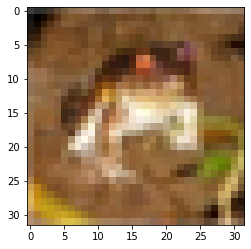

In [13]:
plt.imshow(X_train[0])       # the image will still be the same even after scaling the values

Creating the model

* Generally, filters are choosen based off the powers of 2 like 2,4,8,16,32,64,128 ..
* For complex image classification, we need to add more filters
* To start off, 32 is a good number of filters to start with
      kernel_size ----> the size of the filter, (4,4) is good to start with 
      strides     ----> the number of steps taken to slide, default is (1,1)
      padding     ----> has 2 values - 'valid' or 'same'
* valid - don't apply any padding, assumes that all dimensions are valid, so that image fully gets covered by filter.
* same - apply padding to input, so that the input image gets fully covered by the filter.
* Here, 32/4 = 8. If any decimal places were returned like 8.1 then we use the value 'same' for padding if it's divisible then 'valid'

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
# max-pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
# max-pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# flatten layer before Fully connected layer
model.add(Flatten())
# fully connected layer
model.add(Dense(256, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [29]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [42]:
# Early Stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [43]:
# Training

model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), callbacks=[early_stop], epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7510 - accuracy: 0.7372 - val_loss: 0.9494 - val_accuracy: 0.6810
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6832 - accuracy: 0.7610 - val_loss: 0.9879 - val_accuracy: 0.6732
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6179 - accuracy: 0.7830 - val_loss: 0.9922 - val_accuracy: 0.6720


Model evaluation

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 256)              

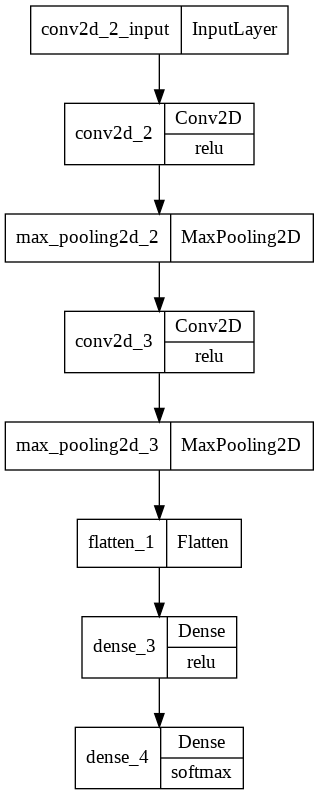

In [45]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=False)

In [46]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.750974,0.73720,0.949444,0.6810
1,0.683168,0.76096,0.987879,0.6732
2,0.617858,0.78298,0.992153,0.6720


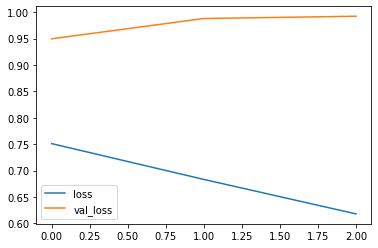

In [47]:
metrics[['loss','val_loss']].plot()

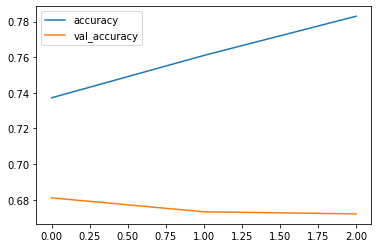

In [48]:
metrics[['accuracy','val_accuracy']].plot()

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9921534061431885, 0.671999990940094]

In [51]:
# prediction
pred = model.predict(X_test)
pred_classes = [np.argmax(element) for element in pred]

In [52]:
pred_classes[:5]

[3, 8, 8, 0, 4]

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_classes))
print(confusion_matrix(y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1000
           1       0.79      0.80      0.79      1000
           2       0.61      0.50      0.55      1000
           3       0.51      0.44      0.47      1000
           4       0.55      0.71      0.62      1000
           5       0.63      0.52      0.57      1000
           6       0.67      0.83      0.74      1000
           7       0.72      0.73      0.72      1000
           8       0.76      0.78      0.77      1000
           9       0.72      0.78      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

[[642  25  59  14  51   5  18  15 115  56]
 [ 20 798  10   9  12   3  11   2  31 104]
 [ 54   4 503  71 147  53  94  42  14  18]
 [ 15  14  60 439 124 132 127  53  15  21]
 [ 15   6  61  45 708  23  54  66  13   9]
 [ 13   5  56 193  70 516 

Using CNN, we achieve 67% accuracy

In [54]:
from tensorflow.keras.models import load_model
model.save('CIFAR10_CNN.h5')